In [1]:
import pandas as pd
import numpy as np


trdt=pd.read_csv('C://Users//Ant Pc//GitHub//PyCaret-AutoML//train.csv')
tstdt=pd.read_csv('C://Users//Ant Pc//GitHub//PyCaret-AutoML//test.csv')

#Add or remove features as you like here.
#One hot Encoding is done automatically

from pycaret.regression import *
#set up data and preprocessing techniques 
exp_reg101 = setup(data = trdt, 
                   target ='SalePrice', 
                   session_id=123,
                   normalize = True,
                   transformation = True, 
                   transform_target = True,
                   combine_rare_levels = True, 
                   rare_level_threshold = 0.05,
                   remove_multicollinearity = True, 
                   multicollinearity_threshold = 0.95,
                   feature_selection = True) 

#Beware of your ram. Big datasets require way more memory than 8/16 GB. Should work fine for most Hackathon datasets

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,58
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Dataset is house prcing from Kaggle find it here https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [2]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,1.557e+04,8.269e+08,2.798e+04,0.8794,0.1296,0.0894,5.764
1,Support Vector Machine,1.607e+04,8.803e+08,2.86e+04,0.8733,0.135,0.0934,0.1595
2,Light Gradient Boosting Machine,1.799e+04,8.972e+08,2.922e+04,0.8685,0.1456,0.104,0.161
3,Extreme Gradient Boosting,1.762e+04,9.21e+08,2.955e+04,0.8654,0.1392,0.1,0.2481
4,Gradient Boosting Regressor,1.767e+04,9.462e+08,2.987e+04,0.8621,0.1394,0.1,0.5584
5,Random Forest,1.942e+04,1.208e+09,3.373e+04,0.8244,0.1553,0.1101,0.2594
6,Extra Trees Regressor,2.183e+04,1.451e+09,3.733e+04,0.7838,0.1738,0.1216,0.2559
7,Bayesian Ridge,1.681e+04,1.512e+09,3.401e+04,0.7772,0.1416,0.0974,0.0581
8,K Neighbors Regressor,2.248e+04,1.559e+09,3.865e+04,0.7683,0.1779,0.1256,0.0427
9,Passive Aggressive Regressor,2.263e+04,1.671e+09,3.789e+04,0.7573,0.1715,0.1288,0.0182


In [3]:
cat=create_model('catboost',fold=10) #10 fold cross validation with best model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.821e+04,1.359e+09,3.686e+04,0.834,0.1648,0.1054
1,1.517e+04,6.925e+08,2.632e+04,0.8919,0.1205,0.0823
2,1.165e+04,3.07e+08,1.752e+04,0.9335,0.1123,0.077
3,1.418e+04,5.89e+08,2.427e+04,0.8865,0.1188,0.0828
4,1.776e+04,1.565e+09,3.956e+04,0.8408,0.1643,0.1074
5,1.658e+04,1.073e+09,3.276e+04,0.8513,0.1295,0.092
6,1.437e+04,4.387e+08,2.095e+04,0.9069,0.1021,0.0789
7,1.604e+04,7.261e+08,2.695e+04,0.8935,0.131,0.0902
8,1.642e+04,9.578e+08,3.095e+04,0.8571,0.1413,0.096
9,1.532e+04,5.605e+08,2.367e+04,0.8984,0.1113,0.0826


In [4]:
cat_tuned=tune_model(cat,n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.946e+04,1.465e+09,3.828e+04,0.821,0.1609,0.1055
1,1.487e+04,5.177e+08,2.275e+04,0.9192,0.1192,0.0838
2,1.302e+04,4.187e+08,2.046e+04,0.9094,0.1297,0.0853
3,1.614e+04,6.795e+08,2.607e+04,0.869,0.1232,0.0909
4,1.858e+04,1.824e+09,4.271e+04,0.8144,0.1721,0.1124
5,1.711e+04,9.796e+08,3.13e+04,0.8643,0.126,0.0939
6,1.4e+04,4.171e+08,2.042e+04,0.9115,0.1011,0.0779
7,1.622e+04,7.151e+08,2.674e+04,0.8951,0.131,0.0911
8,1.684e+04,9.505e+08,3.083e+04,0.8581,0.149,0.0997
9,1.567e+04,6.158e+08,2.481e+04,0.8884,0.1216,0.087


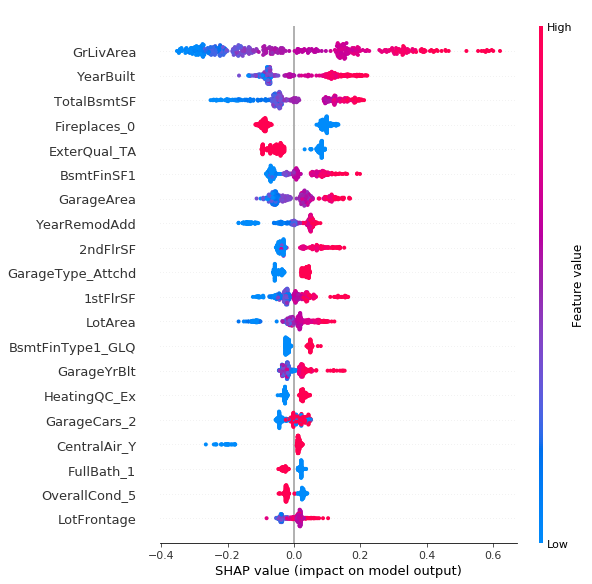

In [5]:
interpret_model(cat_tuned)
#outputs shapley values 
#features are ordered in the descending order of feature importance
#know more about it here https://pycaret.org/interpret-model/

In [7]:
cat_bg=ensemble_model(cat_tuned)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.885e+04,1.745e+09,4.178e+04,0.7868,0.1692,0.1064
1,1.588e+04,6.369e+08,2.524e+04,0.9006,0.1219,0.087
2,1.171e+04,3.376e+08,1.837e+04,0.9269,0.1149,0.0757
3,1.423e+04,6.12e+08,2.474e+04,0.882,0.1148,0.0797
4,1.835e+04,1.72e+09,4.147e+04,0.825,0.1704,0.11
5,1.647e+04,1.163e+09,3.41e+04,0.8389,0.1286,0.0912
6,1.405e+04,3.869e+08,1.967e+04,0.9179,0.099,0.0782
7,1.592e+04,6.966e+08,2.639e+04,0.8978,0.1309,0.0901
8,1.644e+04,1.048e+09,3.237e+04,0.8436,0.1459,0.095
9,1.454e+04,5.081e+08,2.254e+04,0.9079,0.1098,0.0804


In [8]:
cat_bosst=ensemble_model(cat_tuned, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.963e+04,1.441e+09,3.797e+04,0.8239,0.1682,0.1061
1,1.585e+04,6.674e+08,2.583e+04,0.8958,0.1211,0.0862
2,1.241e+04,3.541e+08,1.882e+04,0.9233,0.1151,0.0791
3,1.536e+04,6.205e+08,2.491e+04,0.8804,0.1228,0.089
4,1.869e+04,1.675e+09,4.092e+04,0.8296,0.17,0.1123
5,1.702e+04,1.139e+09,3.375e+04,0.8422,0.1389,0.0954
6,1.498e+04,4.669e+08,2.161e+04,0.901,0.104,0.0816
7,1.638e+04,6.545e+08,2.558e+04,0.904,0.1297,0.0922
8,1.647e+04,9.358e+08,3.059e+04,0.8603,0.1422,0.0958
9,1.582e+04,6.101e+08,2.47e+04,0.8895,0.1169,0.0853


In [9]:
blend_all=blend_models() #gives average of individul predictions of various models 
#just putting here to show feature not actually useful in this case 
#you can also choose which and how many models to blend

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.905e+05,4.446e+10,2.109e+05,-4.43,12.07,1
1,1.862e+05,4.107e+10,2.027e+05,-5.409,12.07,1
2,1.704e+05,3.364e+10,1.834e+05,-6.283,11.98,1
3,2.538e+04,3.293e+09,5.738e+04,0.3653,2.895,0.143
4,1.82e+05,4.295e+10,2.072e+05,-3.369,12,1
5,1.786e+05,3.913e+10,1.978e+05,-4.421,12.02,1
6,1.784e+05,3.655e+10,1.912e+05,-6.754,12.03,1
7,1.811e+05,3.963e+10,1.991e+05,-4.815,11.97,0.9914
8,1.802e+05,3.918e+10,1.979e+05,-4.848,12.02,1
9,1.765e+05,3.666e+10,1.915e+05,-5.642,12.01,1


In [10]:
cat_final=finalize_model(cat_bosst)

In [11]:
predictions = predict_model(cat_final, data=tstdt)
predictions.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,141376.2939
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,167800.1112
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,219079.8117
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,228506.2075
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,197919.5687


In [12]:
finalpred=predictions[['Id','Label']]
finalpred.rename(columns={'Label':'SalePrice'},inplace=True)
finalpred.to_csv('catboostsubmission.csv')

Many other functionalities like saving model to a pickle file, stacking models also exist.
For their well written documentation, please refer
https://pycaret.org/
Now hack your way out of Hackathons with godspeed. Cheers.